Pruebas

In [ ]:
#1. r = 25 mm, w = 2 [mm] and α = 60◦;
#2. r = 25 mm, w = 6 [mm] and α = 45◦.

import math

PI=math.pi

def calculos_iniciales(alfa, b, diametro_mandril, PI):
    print(f"alfa_inicial={alfa}")
    alfa=math.radians(alfa)
    b_eff = b / math.cos(alfa) #Ancho efectivo de las fibras
    radio = diametro_mandril/2
    #Correción del ángulo
    NP = 2 * PI * radio / b_eff
    NP_ceil = math.ceil(2 * PI * radio / b_eff)
    NP_floor = math.floor(2 * PI * radio / b_eff)
    b_eff_ceil=(2 * PI * radio)/NP_ceil
    b_eff_floor=(2 * PI * radio)/NP_floor

    alfa=math.acos(b/b_eff)
    DELTA=2*PI/NP
    print(f"alfa_radianes={alfa}\n b_eff={b_eff}\n b_eff={b_eff_ceil}\n b_eff={b_eff_floor}\n radio={radio}\n NP_ceil={NP_ceil}\n NP_floor={NP_floor}\n NP={NP}\n DELTA={DELTA}")

## Caso 1:

In [ ]:
calculos_iniciales(60, 2, 50, PI)

Resultados:  
alfa_inicial=60  
alfa_radianes=1.0471975511965976  
b_eff=3.999999999999999  
b_eff=3.9269908169872414  
b_eff=4.027682889217684  
radio=25.0  
NP_ceil=40  
NP_floor=39  
NP=39.26990816987242  
DELTA=0.15999999999999998

![Caso 1](./imagenes_notebook/caso_1.png)

La tabla 1 se obtiene por medio de la ecuacion de Diophantine:  
![ecuacion de Diophantine](./imagenes_notebook/ecuacion%20de%20Diophantine.png)  

En donde a y b se obtienen por medio del algoritmo de Euclides.  

In [3]:
def factores_comunes(n):
    factores = []
    for i in range(1, n + 1):
        if n % i == 0:
            factores.append(i)
    print(f"Los factores comunes de {n} son: {factores}")
    return factores

factores_comunes(40)
factores_comunes(39)
factores_comunes(19)
factores_comunes(18)


Los factores comunes de 40 son: [1, 2, 4, 5, 8, 10, 20, 40]
Los factores comunes de 39 son: [1, 3, 13, 39]
Los factores comunes de 19 son: [1, 19]
Los factores comunes de 18 son: [1, 2, 3, 6, 9, 18]


[1, 2, 3, 6, 9, 18]

## Caso 2:

In [ ]:
calculos_iniciales(45, 6, 50, PI)

Resultados:  
alfa_inicial=45  
alfa_radianes=0.7853981633974483  
b_eff=8.48528137423857  
b_eff=8.267349088394193  
b_eff=8.726646259971648  
radio=25.0  
NP_ceil=19  
NP_floor=18  
NP=18.512012242326527  
DELTA=0.3394112549695428

## Ecuación diofántica y el algoritmo de euclides
Para resolver la ecuación diofántica de la forma ***N⋅a−P⋅b=±1*** usando el algoritmo de Euclides en Python, debes emplear el algoritmo extendido de Euclides, que no solo te permitirá encontrar el máximo común divisor (MCD) de dos números, sino también los coeficientes a y b que satisfacen esta ecuación.  
El algoritmo extendido de Euclides trabaja de la siguiente manera:  
Aplicas el algoritmo de Euclides para encontrar el MCD de N y P.  
Durante el proceso, el algoritmo también te proporciona los coeficientes a y b (llamados "coeficientes de Bézout") que satisfacen la ecuación ***N⋅a+P⋅b=MCD***.  
Si el MCD es 1, entonces es posible encontrar soluciones a la ecuación diofántica ***N⋅a−P⋅b=±1***.  
Aquí está el código en Python para implementar el algoritmo extendido de Euclides:

In [ ]:
def euclides_extendido(N, PTR):
    # Inicialización de las variables
    if PTR == 0:
        return (N, 1, 0)  # Caso base, el MCD de N y 0 es N
    else:
        # Llamada recursiva al algoritmo de Euclides
        gcd, a1, b1 = euclides_extendido(P, N % PTR)
        # Los nuevos coeficientes a y b se calculan en función de la recursión
        a = b1
        b = a1 - (N // P) * b1
        return (gcd, a, b)

# Ejemplo de uso con N y P:
N = 40
P = 7

gcd, a, b = euclides_extendido(N, P)

if abs(gcd) == 1:
    print(f"Los valores de a y b que satisfacen la ecuación {N}*a - {P}*b = ±1 son a = {a} y b = {b}.")
else:
    print(f"No hay solución entera, ya que el MCD de {N} y {P} es {gcd}.")


### Explicación:
***euclides_extendido***: Esta función calcula el máximo común divisor (MCD) de N y P mediante el algoritmo de Euclides y también devuelve los coeficientes a y b que resuelven la ecuación ***N⋅a+P⋅b=MCD***.  
Casos base: Si P=0, el MCD es simplemente N, y los coeficientes son a=1 y b=0.  
### Solución: 
Al final, se comprueba si el MCD es 1, lo cual es un requisito para que la ecuación diofántica tenga una solución. Si es así, se imprimen los coeficientes a y b.  
### Ejemplo:
Para **N=40** y **P=7**, el código te devolverá los valores a y b que satisfacen la ecuación ***40⋅a−7⋅b=±1***.  
Este algoritmo es útil en muchos problemas de matemática aplicada, como el cálculo de patrones en el filament winding para encontrar configuraciones óptimas de los ángulos de las fibras sobre el mandril.  

# Mezcla de ambas ecuaciones

In [21]:
# Función para encontrar los factores comunes de N
def divisores_comunes(N):
    divisores = []
    for i in range(1, N + 1):
        if N % i == 0:
            divisores.append(i)
    return divisores

# Función para aplicar el algoritmo de Euclides Extendido solo a valores PTR que no sean divisores de N
def resolver_euclides_extendido(N):
    # Encontrar divisores comunes de N
    divisores = divisores_comunes(N)
    print(f"Divisores de {N}: \n {divisores}")
    
    # Iterar sobre todos los valores de PTR entre 1 y N
    for PTR in range(1, N):
        # Comprobar si PTR no es un divisor de N
        if PTR not in divisores or PTR==1:
            patrones=[]
            contador=0
            for b in range(1, N + 1):
                a=(1+PTR*b)/N
                if a == int(a) and a!=0:
                    patrones.append([N, PTR, int(a), int(b)])  # Agregar patrón como lista
                    contador=contador+1
                a=(-1+PTR*b)/N
                if a == int(a) and a!=0:
                    patrones.append([N, PTR, int(a), int(b)])  # Agregar patrón como lista
                    contador=contador+1
    print(f"Patrones de {N}: \n {["N","PTR","a","b"]} \n {patrones}")
    return patrones

# Ejemplo de uso
resultados_40 = resolver_euclides_extendido(40)
resultados_39 = resolver_euclides_extendido(39)


Divisores de 40: 
 [1, 2, 4, 5, 8, 10, 20, 40]
Patrones de 40: 
 ['N', 'PTR', 'a', 'b'] 
 [[40, 39, 1, 1], [40, 39, 38, 39]]
Divisores de 39: 
 [1, 3, 13, 39]
Patrones de 39: 
 ['N', 'PTR', 'a', 'b'] 
 [[39, 38, 1, 1], [39, 38, 37, 38]]


In [16]:
def resolver_ecuaciones(N):
    patrones = []  # Inicializamos la lista para almacenar patrones
    divisores = []
    for i in range(1, N + 1):
        if N % i == 0:
            divisores.append(i)
    print(f"Divisores comunes={divisores}")
    numeros_excluidos = [i for i in range(1, N + 1) if i not in divisores]
    numeros_excluidos.insert(0,1) #agregamos el 1, q anteriomente habia sido excluido
    print(f"Números excluidos={numeros_excluidos}")
    for PTR in numeros_excluidos:
        # Encontramos soluciones para N*a - PTR*b = 1
        for b in range(1, N + 2):  # Rango ajustado para que b no sea mayor que N + 1
            a = (PTR * b + 1) / N
            if a.is_integer() and a > 0:  # Comprobar si 'a' es un número entero y positivo
                patrones.append((N, PTR, int(a), b, N*a-PTR*b))  # Agregamos el par (a, b)
                print(f"Soluciones encontradas para N={N} y PTR={PTR}: a={int(a)}, b={b}, {N*a-PTR*b}")
            a = (PTR * b - 1) / N
            if a.is_integer() and a > 0:  # Comprobar si 'a' es un número entero y positivo
                patrones.append((N, PTR, int(a), b, N*a-PTR*b))  # Agregamos el par (a, b)
                print(f"Soluciones encontradas para N={N} y PTR={PTR}: a={int(a)}, b={b}, {N*a-PTR*b}")
    print(f"Soluciones encontradas: {patrones}")
    return patrones  # Retornamos la lista de patrones

# Ejemplo de uso
#1	3	7	9	11	13	17	19

#print(resolver_ecuaciones(39))

print(resolver_ecuaciones(8))


Divisores comunes=[1, 2, 4, 8]
Números excluidos=[1, 3, 5, 6, 7]
Soluciones encontradas para N=8 y PTR=1: a=1, b=7, 1.0
Soluciones encontradas para N=8 y PTR=1: a=1, b=9, -1.0
Soluciones encontradas para N=8 y PTR=3: a=1, b=3, -1.0
Soluciones encontradas para N=8 y PTR=3: a=2, b=5, 1.0
Soluciones encontradas para N=8 y PTR=5: a=2, b=3, 1.0
Soluciones encontradas para N=8 y PTR=5: a=3, b=5, -1.0
Soluciones encontradas para N=8 y PTR=7: a=1, b=1, 1.0
Soluciones encontradas para N=8 y PTR=7: a=6, b=7, -1.0
Soluciones encontradas para N=8 y PTR=7: a=8, b=9, 1.0
Soluciones encontradas: [(8, 1, 1, 7, 1.0), (8, 1, 1, 9, -1.0), (8, 3, 1, 3, -1.0), (8, 3, 2, 5, 1.0), (8, 5, 2, 3, 1.0), (8, 5, 3, 5, -1.0), (8, 7, 1, 1, 1.0), (8, 7, 6, 7, -1.0), (8, 7, 8, 9, 1.0)]
[(8, 1, 1, 7, 1.0), (8, 1, 1, 9, -1.0), (8, 3, 1, 3, -1.0), (8, 3, 2, 5, 1.0), (8, 5, 2, 3, 1.0), (8, 5, 3, 5, -1.0), (8, 7, 1, 1, 1.0), (8, 7, 6, 7, -1.0), (8, 7, 8, 9, 1.0)]


# Dibujar el patron:

In [51]:
import matplotlib.pyplot as plt

def dibujar_area(puntos, ax):
    # Separar las coordenadas X e Y de los puntos
    x, y = zip(*puntos)
    
    # Dibujar el polígono cerrando la figura al unir el primer y último punto
    ax.fill(x, y, 'b', alpha=0.3)  # Relleno con color azul y algo de transparencia

    # Configurar límites del gráfico si es necesario (opcional, si todas las áreas están dentro del mismo rango)
    ax.set_xlim(min(x) - 1, max(x) + 1)
    ax.set_ylim(min(y) - 1, max(y) + 1)

# Llamar a la función para dibujar el área
def areas_patron(N):
    x0=[]
    xN=[]
    y0=[]
    yN=[]
    for i in range(0,N+1):
        x0.append((0,i))
        xN.append((N,i))
        y0.append((i,0))
        yN.append((i,N))
    areas_x=[]
    areas_y=[]
    for k in range(0,N):
        areas_x.append([y0[k], yN[k], yN[k+1], y0[k+1]])  # Llenamos áreas x
        areas_y.append([x0[k], x0[k+1], xN[k+1], xN[k]])  # Llenamos áreas y
    print(f"y0={y0} \n yN={yN} \n x0={x0} \n xN={xN}")
    print(f"areas_x={areas_x} \n areas_y={areas_y}")
    print(len(areas_y))
    print(len(areas_x))
    return 
  
def graficar_multiples_areas(lista_de_areas):
    # Crear la figura y el eje una sola vez
    fig, ax = plt.subplots()
    
    # Iterar sobre cada conjunto de puntos en la lista de áreas
    for puntos in lista_de_areas:
        dibujar_area(puntos, ax)
    
    # Etiquetar los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Mostrar el gráfico con todas las áreas
    plt.show()

def orden_de_listas_areas(N, ORDEN):
    areas_x, areas_y = areas_patron(N)
    lista_areas=[]
    for i in range(0,N):
        lista_areas.append(areas_y[ORDEN[i-1]])
        lista_areas.append(areas_x[ORDEN[i-1]])
        print(ORDEN[i])

lista_1=orden_de_listas_areas(10, [1,2,3,4,5,6,7,8,9,10])
graficar_multiples_areas(lista_1)
lista_2=orden_de_listas_areas(10, [1,4,7,10,3,6,9,2,5,8])
graficar_multiples_areas(lista_2)




y0=[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0)] 
 yN=[(0, 10), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (10, 10)] 
 x0=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] 
 xN=[(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)]
areas_x=[[(0, 0), (0, 10), (1, 10), (1, 0)], [(1, 0), (1, 10), (2, 10), (2, 0)], [(2, 0), (2, 10), (3, 10), (3, 0)], [(3, 0), (3, 10), (4, 10), (4, 0)], [(4, 0), (4, 10), (5, 10), (5, 0)], [(5, 0), (5, 10), (6, 10), (6, 0)], [(6, 0), (6, 10), (7, 10), (7, 0)], [(7, 0), (7, 10), (8, 10), (8, 0)], [(8, 0), (8, 10), (9, 10), (9, 0)], [(9, 0), (9, 10), (10, 10), (10, 0)]] 
 areas_y=[[(0, 0), (0, 1), (10, 1), (10, 0)], [(0, 1), (0, 2), (10, 2), (10, 1)], [(0, 2), (0, 3), (10, 3), (10, 2)], [(0, 3), (0, 4), (10, 4), (10, 3)], [(0, 4), (0, 5), (10, 5), (10, 4)], [(0, 5), (0, 6), (10, 6), (10, 5)], [(

TypeError: cannot unpack non-iterable NoneType object

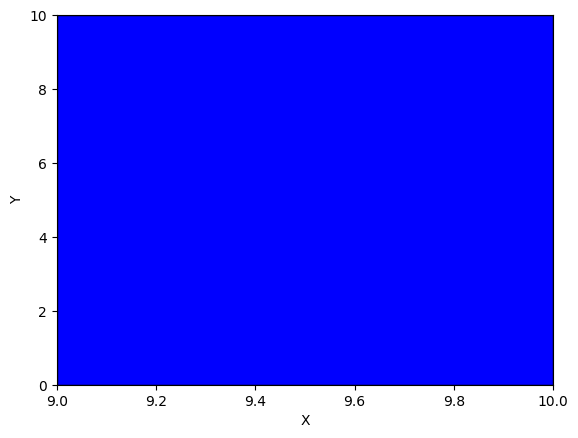

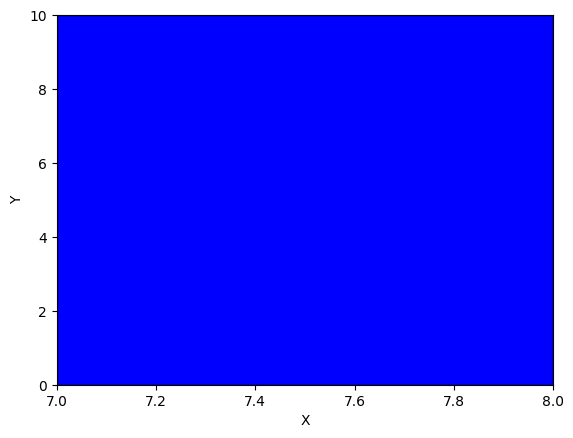

In [56]:
import matplotlib.pyplot as plt

def dibujar_area(puntos, ax, color):
    # Separar las coordenadas X e Y de los puntos
    x, y = zip(*puntos)
    
    # Dibujar el polígono cerrando la figura al unir el primer y último punto
    ax.fill(x, y, color, edgecolor='black')  # Relleno con el color especificado y bordes negros

    # Configurar límites del gráfico si es necesario (opcional)
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))

# Llamar a la función para generar las áreas
def areas_patron(N):
    x0 = []
    xN = []
    y0 = []
    yN = []
    for i in range(0, N + 1):
        x0.append((0, i))
        xN.append((N, i))
        y0.append((i, 0))
        yN.append((i, N))
    
    areas_x = []
    areas_y = []
    for k in range(0, N):
        areas_x.append([y0[k], yN[k], yN[k + 1], y0[k + 1]])  # Llenamos áreas x
        areas_y.append([x0[k], x0[k + 1], xN[k + 1], xN[k]])  # Llenamos áreas y
    
    return areas_x, areas_y

def graficar_multiples_areas(lista_de_areas):
    # Crear la figura y el eje una sola vez
    fig, ax = plt.subplots()

    # Iterar sobre la lista de áreas con el índice
    for index, puntos in enumerate(lista_de_areas):
        # Verificar si el índice es par o impar
        if index % 2 == 0:
            dibujar_area(puntos, ax, 'red')
            # Código para manejar el caso par
        else:
            dibujar_area(puntos, ax, 'blue')
            # Código para manejar el caso impar

    # Etiquetar los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Mostrar el gráfico con todas las áreas
    plt.show()

def orden_de_listas_areas(N, ORDEN):
    areas_x, areas_y = areas_patron(N)
    lista_areas = []
    
    for i in range(len(ORDEN)):  # Ajustar índice
        lista_areas.append(areas_y[ORDEN[i] - 1])
        lista_areas.append(areas_x[ORDEN[i] - 1])
    
    return lista_areas

# Ejemplo de uso
lista_1 = orden_de_listas_areas(10, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
graficar_multiples_areas(lista_1)

lista_2 = orden_de_listas_areas(10, [1, 4, 7, 10, 3, 6, 9, 2, 5, 8])
graficar_multiples_areas(lista_2)


In [8]:
for i in range(1, 34 + 1):
    print(f"=INDIRECTO(\"'\" & $A1 & \"'!\" & CELDA(\"direccion\"; $A${i}))")

=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$1))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$2))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$3))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$4))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$5))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$6))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$7))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$8))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$9))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$10))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$11))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$12))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$13))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$14))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$15))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$16))
=INDIRECTO("'" & $A1 & "'!" & CELDA("direccion"; $A$17))
=INDIRECTO("'" & $A1 & "'!" & CELDA("dir

## Vinodradov


In [8]:
def vinodradov(N):
    divisores = []
    for i in range(1, N + 1):
        if N % i == 0:
            divisores.append(i)
    print(f"Divisores comunes={divisores}")
    numeros_excluidos = [i for i in range(1, N + 1) if i not in divisores]
    print(f"numeros_excluidos{numeros_excluidos}")
    PTR=[]
    a=[]
    b=[]
    #Agregamos los valores por defeto, para el caso del paso unitario
    PTR.append(1)
    a.append(1)
    b.append(N-1)

    for numeros_excluido in numeros_excluidos:
      
        A=[]
        B=[]
        C=[]
        D=[]
        E=[]
        A.append(N)  # Agrega N como el primer elemento
        A.append(numeros_excluido)  # Agrega numeros_excluido como el segundo elemento
        B.append(0)
        B.append(0)
        C.append(1)
        C.append(0)
        D.append(0)
        D.append(1)
        E.append(0)
        E.append(1)

        contador=2
        while A[contador-1]>0:
            A.append(A[contador-2]%A[contador-1]) #calculamos el modulo o residuo y lo guardamos en el vector A
            contador=contador+1
        A.append(0)
        if A[contador-2]==1:
            for j in range(2,contador):
                B.append(int(A[j-2]/A[j-1]))
                C.append(B[j]*C[j-1]+C[j-2])
                D.append(B[j]*D[j-1]+D[j-2])
                E.append(-E[j-1])
            
            if D[contador - 2] not in b:
                PTR.append(A[1])
                a.append(C[contador-2])
                b.append(D[contador-2])
    print(f"N={N}, PTR={PTR}, a={a}, b={b}")
    patrones_posibles=[]
    for ptr, val_a, val_b in zip(PTR, a, b):
        patrones_posibles.append([N, ptr, val_a, val_b])
    print(f"patrones_posibles{patrones_posibles}")
    return(patrones_posibles)

def obteniendo_orden_del_patron(N, paso):
    variable=1
    patron=[]
    while len(patron)<N:
        patron.append(variable)
        variable=variable+paso
        if variable>N:
            variable=variable-N
    print(patron)
    return patron

N=40
patrones=vinodradov(N)
for patron in patrones:
    paso=patron[3]
    print(paso)
    obteniendo_orden_del_patron(N,paso)

obteniendo_orden_del_patron(40, 3)
obteniendo_orden_del_patron(40, 7)
obteniendo_orden_del_patron(40, 9)
obteniendo_orden_del_patron(40, 11)
obteniendo_orden_del_patron(40, 13)
obteniendo_orden_del_patron(40, 17)
obteniendo_orden_del_patron(40, 19)



Divisores comunes=[1, 2, 4, 5, 8, 10, 20, 40]
numeros_excluidos[3, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
N=40, PTR=[1, 3, 7, 9, 11, 13, 17, 19, 39], a=[1, 1, 3, 2, 3, 1, 3, 9, 1], b=[39, 13, 17, 9, 11, 3, 7, 19, 1]
patrones_posibles[[40, 1, 1, 39], [40, 3, 1, 13], [40, 7, 3, 17], [40, 9, 2, 9], [40, 11, 3, 11], [40, 13, 1, 3], [40, 17, 3, 7], [40, 19, 9, 19], [40, 39, 1, 1]]
39
[1, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]
13
[1, 14, 27, 40, 13, 26, 39, 12, 25, 38, 11, 24, 37, 10, 23, 36, 9, 22, 35, 8, 21, 34, 7, 20, 33, 6, 19, 32, 5, 18, 31, 4, 17, 30, 3, 16, 29, 2, 15, 28]
17
[1, 18, 35, 12, 29, 6, 23, 40, 17, 34, 11, 28, 5, 22, 39, 16, 33, 10, 27, 4, 21, 38, 15, 32, 9, 26, 3, 20, 37, 14, 31, 8, 25, 2, 19, 36, 13, 30, 7, 24]
9
[1, 10, 19, 28, 37, 6, 15, 24, 33, 2, 11, 20, 29, 38, 7, 16, 25, 34, 3, 

[1,
 20,
 39,
 18,
 37,
 16,
 35,
 14,
 33,
 12,
 31,
 10,
 29,
 8,
 27,
 6,
 25,
 4,
 23,
 2,
 21,
 40,
 19,
 38,
 17,
 36,
 15,
 34,
 13,
 32,
 11,
 30,
 9,
 28,
 7,
 26,
 5,
 24,
 3,
 22]

In [6]:
N=40
numeros_excluido=17
PTR=[]
a=[]
b=[]
#Agregamos los valores por defeto, para el caso del paso unitario
PTR.append(1)
a.append(1)
b.append(N-1)
A=[]
B=[]
C=[]
D=[]
E=[]
A.append(N)  # Agrega N como el primer elemento
A.append(numeros_excluido)  # Agrega numeros_excluido como el segundo elemento
B.append(0)
B.append(0)
C.append(1)
C.append(0)
D.append(0)
D.append(1)
E.append(0)
E.append(1)

contador=2
while A[contador-1]>0:
    A.append(A[contador-2]%A[contador-1]) #calculamos el modulo o residuo y lo guardamos en el vector A
    contador=contador+1
if A[contador-2]==1:
    for j in range(2,contador):
        B.append(int(A[j-2]/A[j-1]))
        C.append(B[j]*C[j-1]+C[j-2])
        D.append(B[j]*D[j-1]+D[j-2])
        E.append(-E[j-1])
    print(D[contador - 2] not in b)  # Esto imprimirá True o False
    print(D[contador - 2])           # Esto imprimirá el valor de D[contador - 1]
    print(b)                         # Esto imprimirá la lista b
    if D[contador - 2] not in b:
        PTR.append(A[1])
        a.append(C[contador-2])
        b.append(D[contador-2])
print(f"N={N}, PTR={PTR}, a={a}, b={b}")

True
7
[39]
N=40, PTR=[1, 17], a=[1, 3], b=[39, 7]


# Invocacion Vinogradov


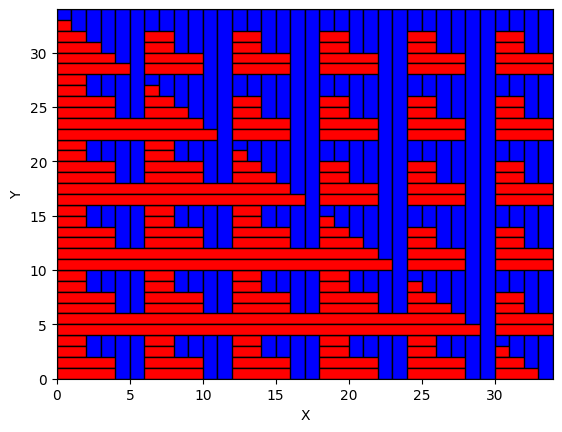

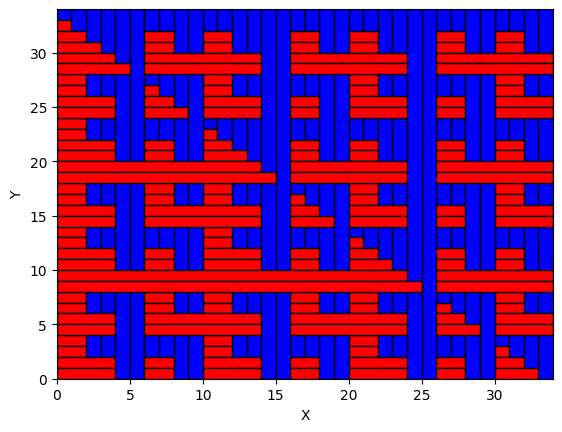

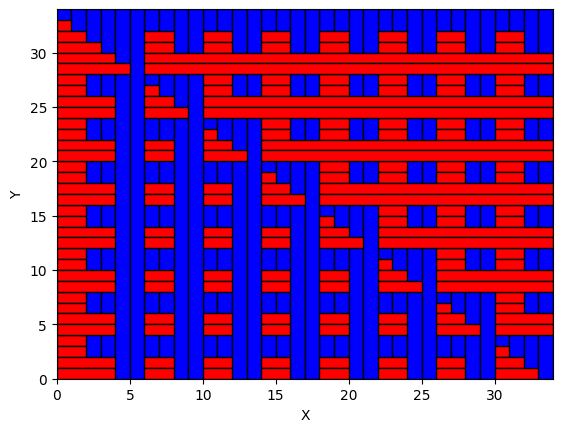

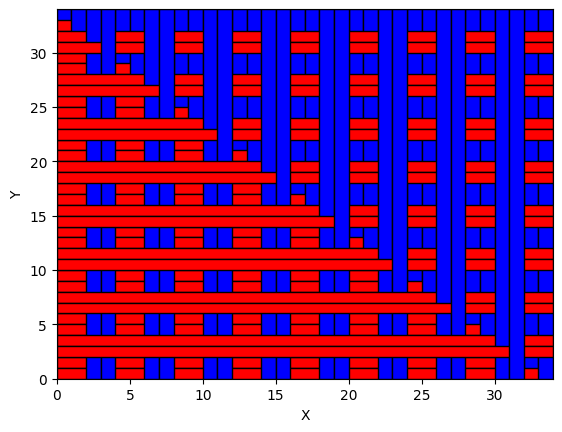

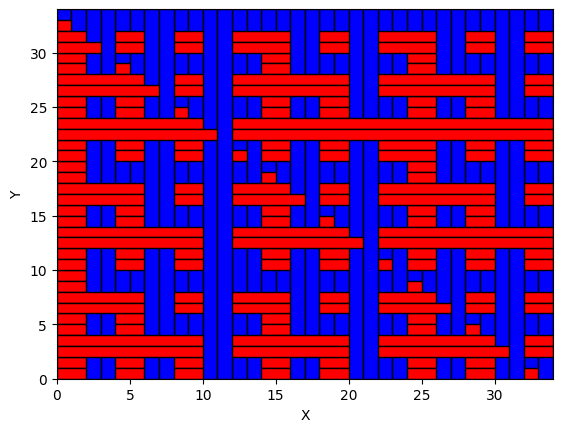

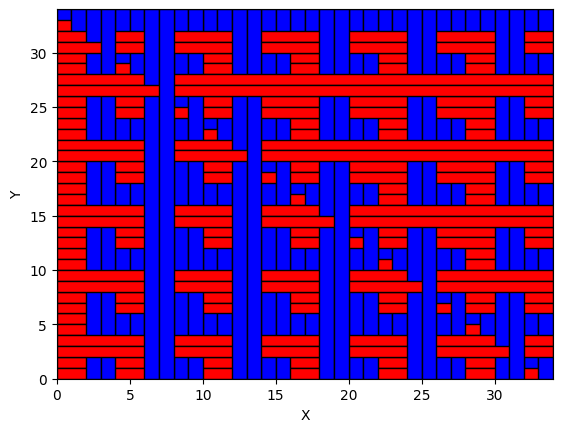

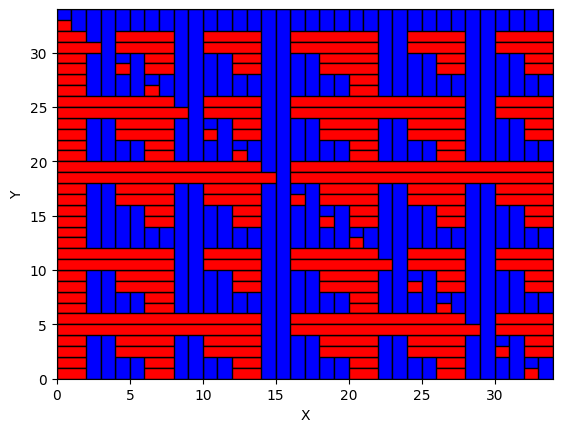

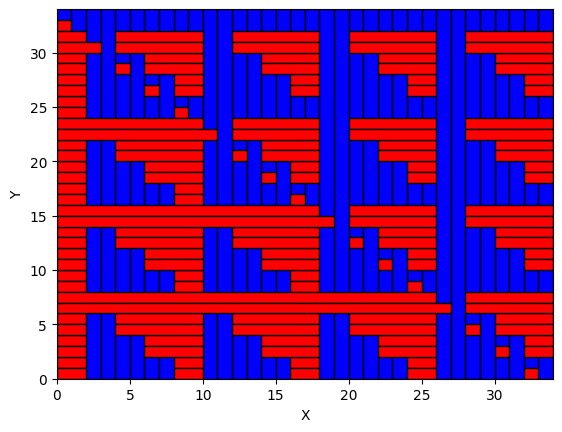

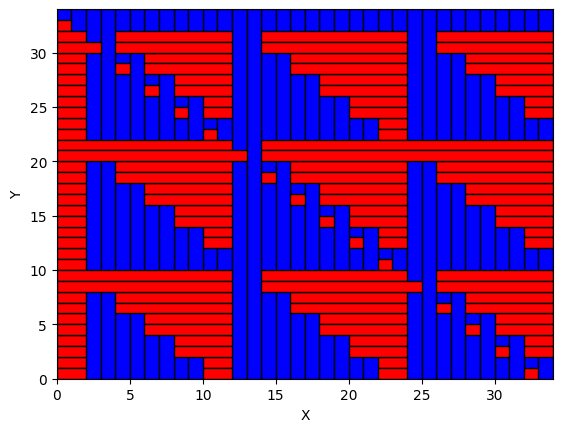

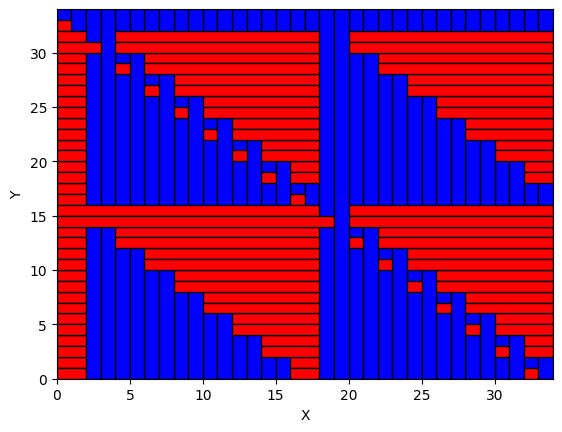

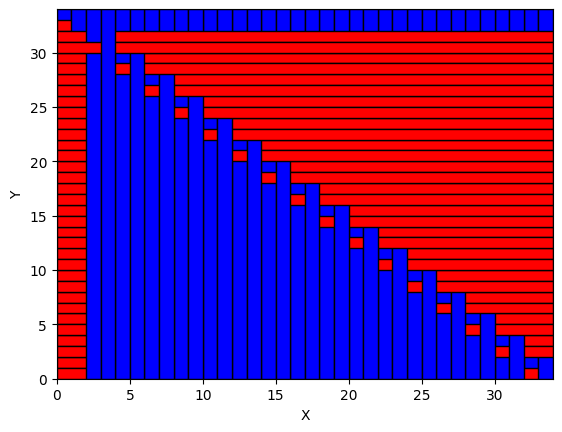

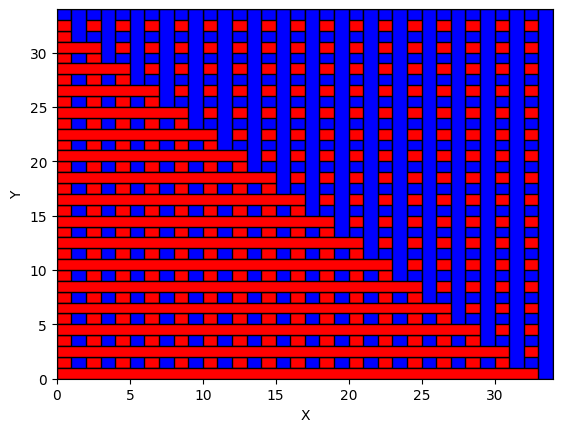

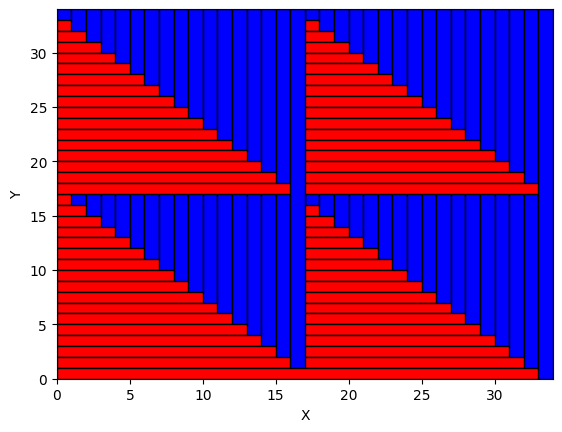

Divisores comunes=[1, 3, 5, 9, 15, 45]
numeros_excluidos[2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
N=45, PTR=[1, 2, 4, 7, 8, 11, 13, 14, 16, 17, 19, 22, 44], a=[1, 1, 1, 2, 3, 1, 2, 5, 5, 3, 8, 1, 1], b=[44, 22, 11, 13, 17, 4, 7, 16, 14, 8, 19, 2, 1]
patrones_posibles[[45, 1, 1, 44], [45, 2, 1, 22], [45, 4, 1, 11], [45, 7, 2, 13], [45, 8, 3, 17], [45, 11, 1, 4], [45, 13, 2, 7], [45, 14, 5, 16], [45, 16, 5, 14], [45, 17, 3, 8], [45, 19, 8, 19], [45, 22, 1, 2], [45, 44, 1, 1]]
44
[1, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]
22
[1, 23, 45, 22, 44, 21, 43, 20, 42, 19, 41, 18, 40, 17, 39, 16, 38, 15, 37, 14, 36, 13, 35, 12, 34, 11, 33, 10, 32, 9, 31, 8, 30, 7, 29, 6, 28, 5, 27, 4, 26, 3, 25, 2, 24]
11
[1, 12, 23, 34, 45, 11, 22, 33, 44, 10, 21, 32, 43, 9, 20,

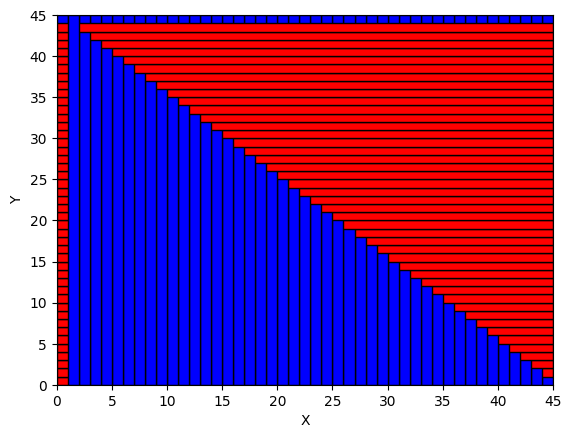

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 22), (0, 23), (45, 23), (45, 22)], [(22, 0), (22, 45), (23, 45), (23, 0)], [(0, 0), (0, 1), (45, 1), (45, 0)], [(44, 0), (44, 45), (45, 45), (45, 0)], [(0, 23), (0, 24), (45, 24), (45, 23)], [(21, 0), (21, 45), (22, 45), (22, 0)], [(0, 1), (0, 2), (45, 2), (45, 1)], [(43, 0), (43, 45), (44, 45), (44, 0)], [(0, 24), (0, 25), (45, 25), (45, 24)], [(20, 0), (20, 45), (21, 45), (21, 0)], [(0, 2), (0, 3), (45, 3), (45, 2)], [(42, 0), (42, 45), (43, 45), (43, 0)], [(0, 25), (0, 26), (45, 26), (45, 25)], [(19, 0), (19, 45), (20, 45), (20, 0)], [(0, 3), (0, 4), (45, 4), (45, 3)], [(41, 0), (41, 45), (42, 45), (42, 0)], [(0, 26), (0, 27), (45, 27), (45, 26)], [(18, 0), (18, 45), (19, 45), (19, 0)], [(0, 4), (0, 5), (45, 5), (45, 4)], [(40, 0), (40, 45), (41, 45), (41, 0)], [(0, 27), (0, 28), (45, 28), (45, 27)], [(17, 0), (17, 45), (18, 45), (18, 0)], [(0, 5), (0, 6), (45, 6), (45, 5)], [(39, 0), (39, 45), (40, 45

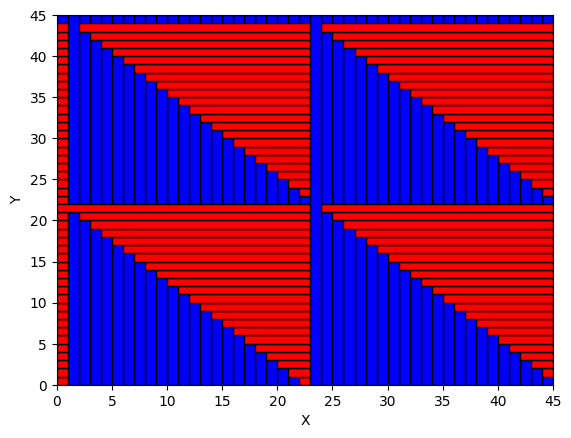

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 33), (0, 34), (45, 34), (45, 33)], [(11, 0), (11, 45), (12, 45), (12, 0)], [(0, 22), (0, 23), (45, 23), (45, 22)], [(22, 0), (22, 45), (23, 45), (23, 0)], [(0, 11), (0, 12), (45, 12), (45, 11)], [(33, 0), (33, 45), (34, 45), (34, 0)], [(0, 0), (0, 1), (45, 1), (45, 0)], [(44, 0), (44, 45), (45, 45), (45, 0)], [(0, 34), (0, 35), (45, 35), (45, 34)], [(10, 0), (10, 45), (11, 45), (11, 0)], [(0, 23), (0, 24), (45, 24), (45, 23)], [(21, 0), (21, 45), (22, 45), (22, 0)], [(0, 12), (0, 13), (45, 13), (45, 12)], [(32, 0), (32, 45), (33, 45), (33, 0)], [(0, 1), (0, 2), (45, 2), (45, 1)], [(43, 0), (43, 45), (44, 45), (44, 0)], [(0, 35), (0, 36), (45, 36), (45, 35)], [(9, 0), (9, 45), (10, 45), (10, 0)], [(0, 24), (0, 25), (45, 25), (45, 24)], [(20, 0), (20, 45), (21, 45), (21, 0)], [(0, 13), (0, 14), (45, 14), (45, 13)], [(31, 0), (31, 45), (32, 45), (32, 0)], [(0, 2), (0, 3), (45, 3), (45, 2)], [(42, 0), (42, 45

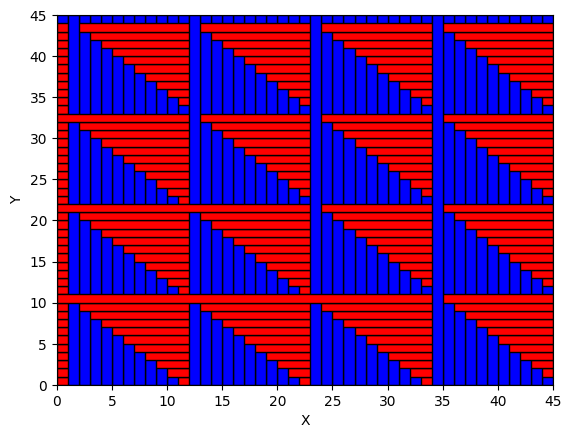

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 31), (0, 32), (45, 32), (45, 31)], [(13, 0), (13, 45), (14, 45), (14, 0)], [(0, 18), (0, 19), (45, 19), (45, 18)], [(26, 0), (26, 45), (27, 45), (27, 0)], [(0, 5), (0, 6), (45, 6), (45, 5)], [(39, 0), (39, 45), (40, 45), (40, 0)], [(0, 37), (0, 38), (45, 38), (45, 37)], [(7, 0), (7, 45), (8, 45), (8, 0)], [(0, 24), (0, 25), (45, 25), (45, 24)], [(20, 0), (20, 45), (21, 45), (21, 0)], [(0, 11), (0, 12), (45, 12), (45, 11)], [(33, 0), (33, 45), (34, 45), (34, 0)], [(0, 43), (0, 44), (45, 44), (45, 43)], [(1, 0), (1, 45), (2, 45), (2, 0)], [(0, 30), (0, 31), (45, 31), (45, 30)], [(14, 0), (14, 45), (15, 45), (15, 0)], [(0, 17), (0, 18), (45, 18), (45, 17)], [(27, 0), (27, 45), (28, 45), (28, 0)], [(0, 4), (0, 5), (45, 5), (45, 4)], [(40, 0), (40, 45), (41, 45), (41, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 23), (0, 24), (45, 24), (45, 23)], [(21, 0), (21, 45), (22

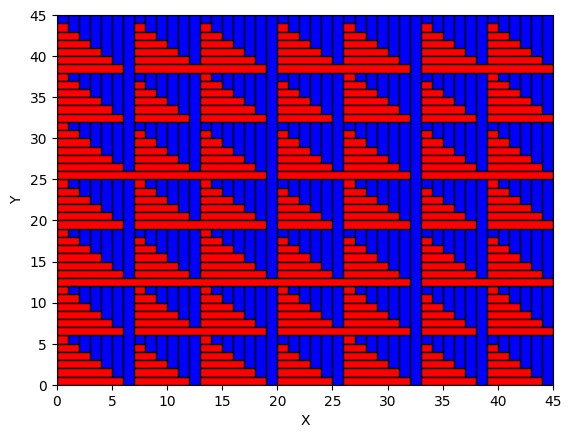

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 27), (0, 28), (45, 28), (45, 27)], [(17, 0), (17, 45), (18, 45), (18, 0)], [(0, 10), (0, 11), (45, 11), (45, 10)], [(34, 0), (34, 45), (35, 45), (35, 0)], [(0, 38), (0, 39), (45, 39), (45, 38)], [(6, 0), (6, 45), (7, 45), (7, 0)], [(0, 21), (0, 22), (45, 22), (45, 21)], [(23, 0), (23, 45), (24, 45), (24, 0)], [(0, 4), (0, 5), (45, 5), (45, 4)], [(40, 0), (40, 45), (41, 45), (41, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13, 45), (13, 0)], [(0, 15), (0, 16), (45, 16), (45, 15)], [(29, 0), (29, 45), (30, 45), (30, 0)], [(0, 43), (0, 44), (45, 44), (45, 43)], [(1, 0), (1, 45), (2, 45), (2, 0)], [(0, 26), (0, 27), (45, 27), (45, 26)], [(18, 0), (18, 45), (19, 45), (19, 0)], [(0, 9), (0, 10), (45, 10), (45, 9)], [(35, 0), (35, 45), (36, 45), (36, 0)], [(0, 37), (0, 38), (45, 38), (45, 37)], [(7, 0), (7, 45), (8, 45), (8, 0)], [(0, 20), (0, 21), (45, 21), (45, 20)], [(24, 0), (24, 45), (

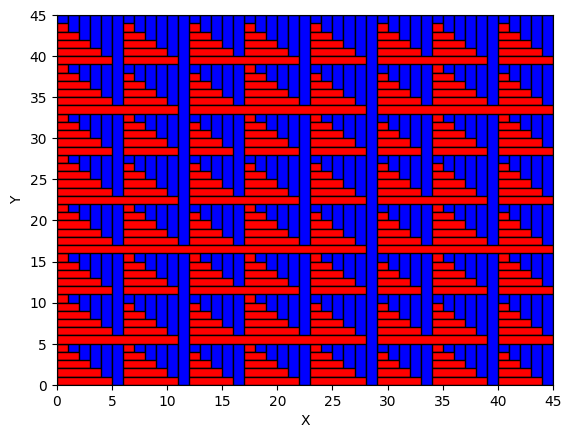

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 40), (0, 41), (45, 41), (45, 40)], [(4, 0), (4, 45), (5, 45), (5, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13, 45), (13, 0)], [(0, 28), (0, 29), (45, 29), (45, 28)], [(16, 0), (16, 45), (17, 45), (17, 0)], [(0, 24), (0, 25), (45, 25), (45, 24)], [(20, 0), (20, 45), (21, 45), (21, 0)], [(0, 20), (0, 21), (45, 21), (45, 20)], [(24, 0), (24, 45), (25, 45), (25, 0)], [(0, 16), (0, 17), (45, 17), (45, 16)], [(28, 0), (28, 45), (29, 45), (29, 0)], [(0, 12), (0, 13), (45, 13), (45, 12)], [(32, 0), (32, 45), (33, 45), (33, 0)], [(0, 8), (0, 9), (45, 9), (45, 8)], [(36, 0), (36, 45), (37, 45), (37, 0)], [(0, 4), (0, 5), (45, 5), (45, 4)], [(40, 0), (40, 45), (41, 45), (41, 0)], [(0, 0), (0, 1), (45, 1), (45, 0)], [(44, 0), (44, 45), (45, 45), (45, 0)], [(0, 41), (0, 42), (45, 42), (45, 41)], [(3, 0), (3, 45), (4, 4

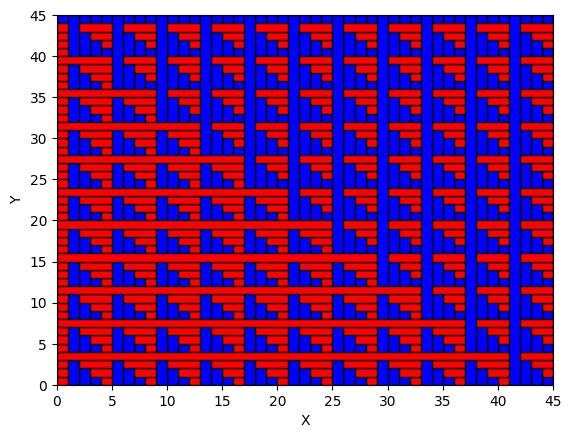

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 37), (0, 38), (45, 38), (45, 37)], [(7, 0), (7, 45), (8, 45), (8, 0)], [(0, 30), (0, 31), (45, 31), (45, 30)], [(14, 0), (14, 45), (15, 45), (15, 0)], [(0, 23), (0, 24), (45, 24), (45, 23)], [(21, 0), (21, 45), (22, 45), (22, 0)], [(0, 16), (0, 17), (45, 17), (45, 16)], [(28, 0), (28, 45), (29, 45), (29, 0)], [(0, 9), (0, 10), (45, 10), (45, 9)], [(35, 0), (35, 45), (36, 45), (36, 0)], [(0, 2), (0, 3), (45, 3), (45, 2)], [(42, 0), (42, 45), (43, 45), (43, 0)], [(0, 40), (0, 41), (45, 41), (45, 40)], [(4, 0), (4, 45), (5, 45), (5, 0)], [(0, 33), (0, 34), (45, 34), (45, 33)], [(11, 0), (11, 45), (12, 45), (12, 0)], [(0, 26), (0, 27), (45, 27), (45, 26)], [(18, 0), (18, 45), (19, 45), (19, 0)], [(0, 19), (0, 20), (45, 20), (45, 19)], [(25, 0), (25, 45), (26, 45), (26, 0)], [(0, 12), (0, 13), (45, 13), (45, 12)], [(32, 0), (32, 45), (33, 45), (33, 0)], [(0, 5), (0, 6), (45, 6), (45, 5)], [(39, 0), (39, 45), (

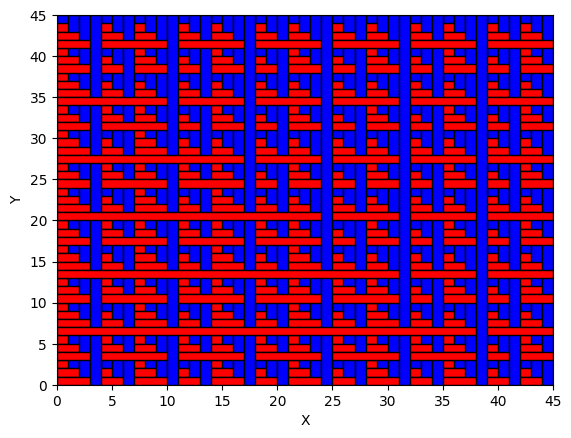

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 28), (0, 29), (45, 29), (45, 28)], [(16, 0), (16, 45), (17, 45), (17, 0)], [(0, 12), (0, 13), (45, 13), (45, 12)], [(32, 0), (32, 45), (33, 45), (33, 0)], [(0, 41), (0, 42), (45, 42), (45, 41)], [(3, 0), (3, 45), (4, 45), (4, 0)], [(0, 25), (0, 26), (45, 26), (45, 25)], [(19, 0), (19, 45), (20, 45), (20, 0)], [(0, 9), (0, 10), (45, 10), (45, 9)], [(35, 0), (35, 45), (36, 45), (36, 0)], [(0, 38), (0, 39), (45, 39), (45, 38)], [(6, 0), (6, 45), (7, 45), (7, 0)], [(0, 22), (0, 23), (45, 23), (45, 22)], [(22, 0), (22, 45), (23, 45), (23, 0)], [(0, 6), (0, 7), (45, 7), (45, 6)], [(38, 0), (38, 45), (39, 45), (39, 0)], [(0, 35), (0, 36), (45, 36), (45, 35)], [(9, 0), (9, 45), (10, 45), (10, 0)], [(0, 19), (0, 20), (45, 20), (45, 19)], [(25, 0), (25, 45), (26, 45), (26, 0)], [(0, 3), (0, 4), (45, 4), (45, 3)], [(41, 0), (41, 45), (42, 45), (42, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13

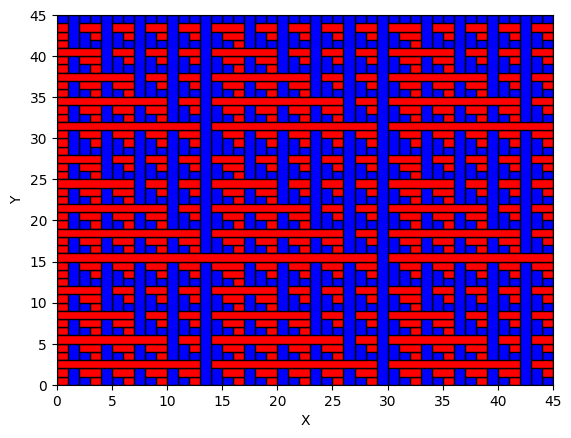

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 30), (0, 31), (45, 31), (45, 30)], [(14, 0), (14, 45), (15, 45), (15, 0)], [(0, 16), (0, 17), (45, 17), (45, 16)], [(28, 0), (28, 45), (29, 45), (29, 0)], [(0, 2), (0, 3), (45, 3), (45, 2)], [(42, 0), (42, 45), (43, 45), (43, 0)], [(0, 33), (0, 34), (45, 34), (45, 33)], [(11, 0), (11, 45), (12, 45), (12, 0)], [(0, 19), (0, 20), (45, 20), (45, 19)], [(25, 0), (25, 45), (26, 45), (26, 0)], [(0, 5), (0, 6), (45, 6), (45, 5)], [(39, 0), (39, 45), (40, 45), (40, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 22), (0, 23), (45, 23), (45, 22)], [(22, 0), (22, 45), (23, 45), (23, 0)], [(0, 8), (0, 9), (45, 9), (45, 8)], [(36, 0), (36, 45), (37, 45), (37, 0)], [(0, 39), (0, 40), (45, 40), (45, 39)], [(5, 0), (5, 45), (6, 45), (6, 0)], [(0, 25), (0, 26), (45, 26), (45, 25)], [(19, 0), (19, 45), (20, 45), (20, 0)], [(0, 11), (0, 12), (45, 12), (45, 11)], [(33, 0), (33, 45), (34

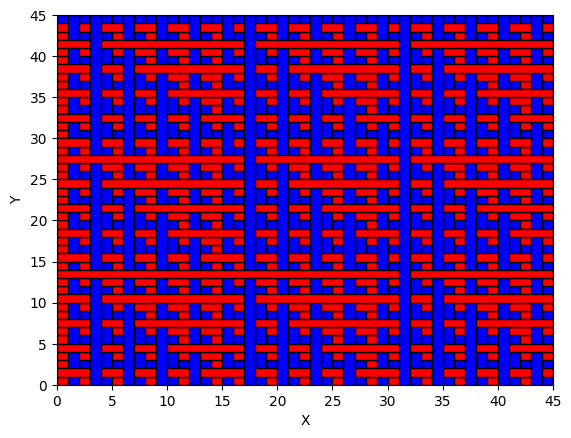

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 28), (0, 29), (45, 29), (45, 28)], [(16, 0), (16, 45), (17, 45), (17, 0)], [(0, 20), (0, 21), (45, 21), (45, 20)], [(24, 0), (24, 45), (25, 45), (25, 0)], [(0, 12), (0, 13), (45, 13), (45, 12)], [(32, 0), (32, 45), (33, 45), (33, 0)], [(0, 4), (0, 5), (45, 5), (45, 4)], [(40, 0), (40, 45), (41, 45), (41, 0)], [(0, 41), (0, 42), (45, 42), (45, 41)], [(3, 0), (3, 45), (4, 45), (4, 0)], [(0, 33), (0, 34), (45, 34), (45, 33)], [(11, 0), (11, 45), (12, 45), (12, 0)], [(0, 25), (0, 26), (45, 26), (45, 25)], [(19, 0), (19, 45), (20, 45), (20, 0)], [(0, 17), (0, 18), (45, 18), (45, 17)], [(27, 0), (27, 45), (28, 45), (28, 0)], [(0, 9), (0, 10), (45, 10), (45, 9)], [(35, 0), (35, 45), (36, 45), (36, 0)], [(0, 1), (0, 2), (45, 2), (45, 1)], [(43, 0), (43, 45), (44, 45), (44, 0)], [(0, 38), (0, 39), (45, 39), (45, 38)], [(6, 0), (6, 45), (7,

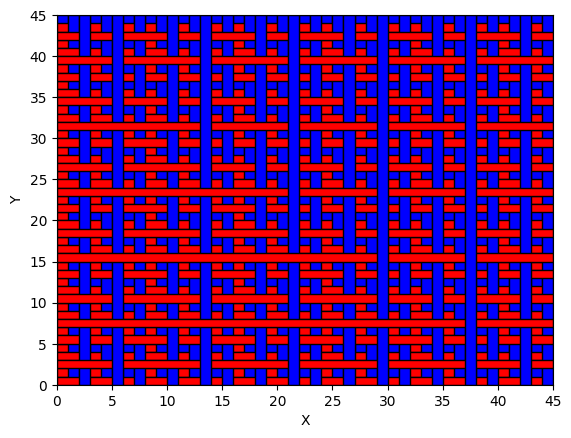

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 25), (0, 26), (45, 26), (45, 25)], [(19, 0), (19, 45), (20, 45), (20, 0)], [(0, 6), (0, 7), (45, 7), (45, 6)], [(38, 0), (38, 45), (39, 45), (39, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13, 45), (13, 0)], [(0, 13), (0, 14), (45, 14), (45, 13)], [(31, 0), (31, 45), (32, 45), (32, 0)], [(0, 39), (0, 40), (45, 40), (45, 39)], [(5, 0), (5, 45), (6, 45), (6, 0)], [(0, 20), (0, 21), (45, 21), (45, 20)], [(24, 0), (24, 45), (25, 45), (25, 0)], [(0, 1), (0, 2), (45, 2), (45, 1)], [(43, 0), (43, 45), (44, 45), (44, 0)], [(0, 27), (0, 28), (45, 28), (45, 27)], [(17, 0), (17, 45), (18, 45), (18, 0)], [(0, 8), (0, 9), (45, 9), (45, 8)], [(36, 0), (36, 45), (37, 45), (37, 0)], [(0, 34), (0, 35), (45, 35), (45, 34)], [(10, 0), (10, 45), (11, 45), (11, 0)], [(0, 15), (0, 16), (45, 16), (45, 15)], [(29, 0), (29, 45), (30, 45), (30, 0)], [(0, 41), (0, 42), (45, 42), (45, 41)], [(3, 0), (3, 45), (

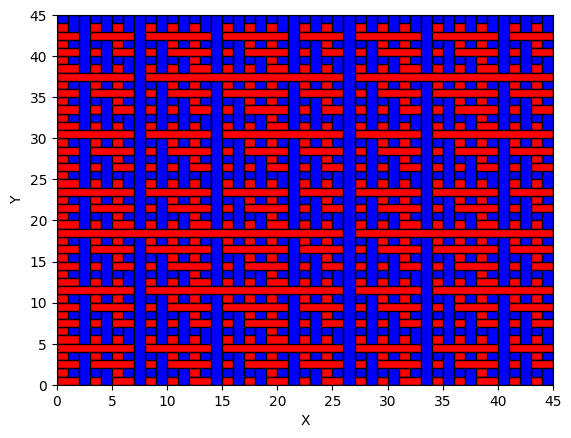

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 42), (0, 43), (45, 43), (45, 42)], [(2, 0), (2, 45), (3, 45), (3, 0)], [(0, 40), (0, 41), (45, 41), (45, 40)], [(4, 0), (4, 45), (5, 45), (5, 0)], [(0, 38), (0, 39), (45, 39), (45, 38)], [(6, 0), (6, 45), (7, 45), (7, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 34), (0, 35), (45, 35), (45, 34)], [(10, 0), (10, 45), (11, 45), (11, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13, 45), (13, 0)], [(0, 30), (0, 31), (45, 31), (45, 30)], [(14, 0), (14, 45), (15, 45), (15, 0)], [(0, 28), (0, 29), (45, 29), (45, 28)], [(16, 0), (16, 45), (17, 45), (17, 0)], [(0, 26), (0, 27), (45, 27), (45, 26)], [(18, 0), (18, 45), (19, 45), (19, 0)], [(0, 24), (0, 25), (45, 25), (45, 24)], [(20, 0), (20, 45), (21, 45), (21, 0)], [(0, 22), (0, 23), (45, 23), (45, 22)], [(22, 0), (22, 45), (23, 45), (23, 0)], [(0, 20), (0, 21), (45, 21), (45, 20)], [(24, 0), (24, 45),

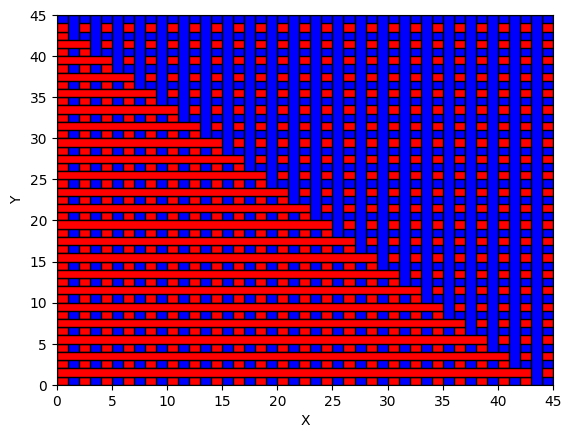

[[(0, 44), (0, 45), (45, 45), (45, 44)], [(0, 0), (0, 45), (1, 45), (1, 0)], [(0, 43), (0, 44), (45, 44), (45, 43)], [(1, 0), (1, 45), (2, 45), (2, 0)], [(0, 42), (0, 43), (45, 43), (45, 42)], [(2, 0), (2, 45), (3, 45), (3, 0)], [(0, 41), (0, 42), (45, 42), (45, 41)], [(3, 0), (3, 45), (4, 45), (4, 0)], [(0, 40), (0, 41), (45, 41), (45, 40)], [(4, 0), (4, 45), (5, 45), (5, 0)], [(0, 39), (0, 40), (45, 40), (45, 39)], [(5, 0), (5, 45), (6, 45), (6, 0)], [(0, 38), (0, 39), (45, 39), (45, 38)], [(6, 0), (6, 45), (7, 45), (7, 0)], [(0, 37), (0, 38), (45, 38), (45, 37)], [(7, 0), (7, 45), (8, 45), (8, 0)], [(0, 36), (0, 37), (45, 37), (45, 36)], [(8, 0), (8, 45), (9, 45), (9, 0)], [(0, 35), (0, 36), (45, 36), (45, 35)], [(9, 0), (9, 45), (10, 45), (10, 0)], [(0, 34), (0, 35), (45, 35), (45, 34)], [(10, 0), (10, 45), (11, 45), (11, 0)], [(0, 33), (0, 34), (45, 34), (45, 33)], [(11, 0), (11, 45), (12, 45), (12, 0)], [(0, 32), (0, 33), (45, 33), (45, 32)], [(12, 0), (12, 45), (13, 45), (13, 0)

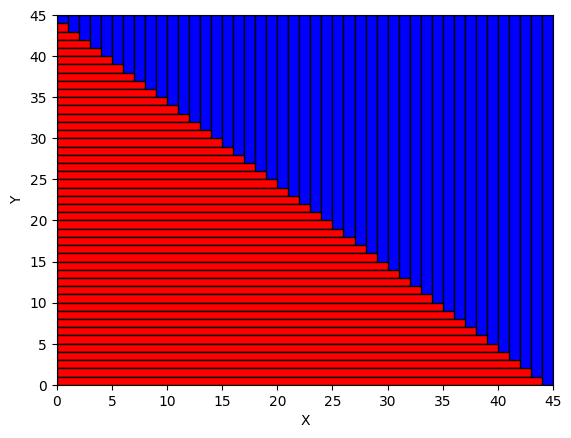

In [10]:
from vinogradov import vinodradov
from vinogradov import obteniendo_orden_del_patron
from grafico_de_patrones import orden_de_listas_areas
from grafico_de_patrones import graficar_multiples_areas

N=45
patrones=vinodradov(N)
listas_de_patrones=[]
for patron in patrones:
    paso=patron[3]
    print(paso)
    listas_de_patrones.append(obteniendo_orden_del_patron(N,paso))

for lista in listas_de_patrones:
    lista = orden_de_listas_areas(N, lista)
    graficar_multiples_areas(lista, N)

In [4]:
import math

alfa=0.7853981633974483
ancho = 6.5
paso_Y=6.5/math.sin(alfa)
print(paso_Y)

9.192388155425117


In [2]:
import math

print( math.log(10))  # Calcula el logaritmo natural de 10

2.302585092994046


In [3]:
print(2180854.64-1824535.00)

356319.64000000013
